# Market Value prediction

Dataset: https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchtext import data, datasets
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import logging

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [113]:
path = 'C://Users//Vanyusha//Desktop//datasets//american_bankruptcy.csv'
df = pd.read_csv(path)

In [114]:
df.head(100)

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
5,C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,...,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
6,C_1,alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,...,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
7,C_1,alive,2006,645.721,837.171,32.199,118.907,342.593,58.660,181.691,...,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
8,C_1,alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,...,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397
9,C_1,alive,2008,851.312,1110.677,40.551,166.080,477.424,78.651,227.300,...,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


In [115]:
df['X8'].describe()

count    7.868200e+04
mean     3.414355e+03
std      1.841410e+04
min      1.000000e-04
25%      3.498000e+01
50%      2.275118e+02
75%      1.244890e+03
max      1.073391e+06
Name: X8, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

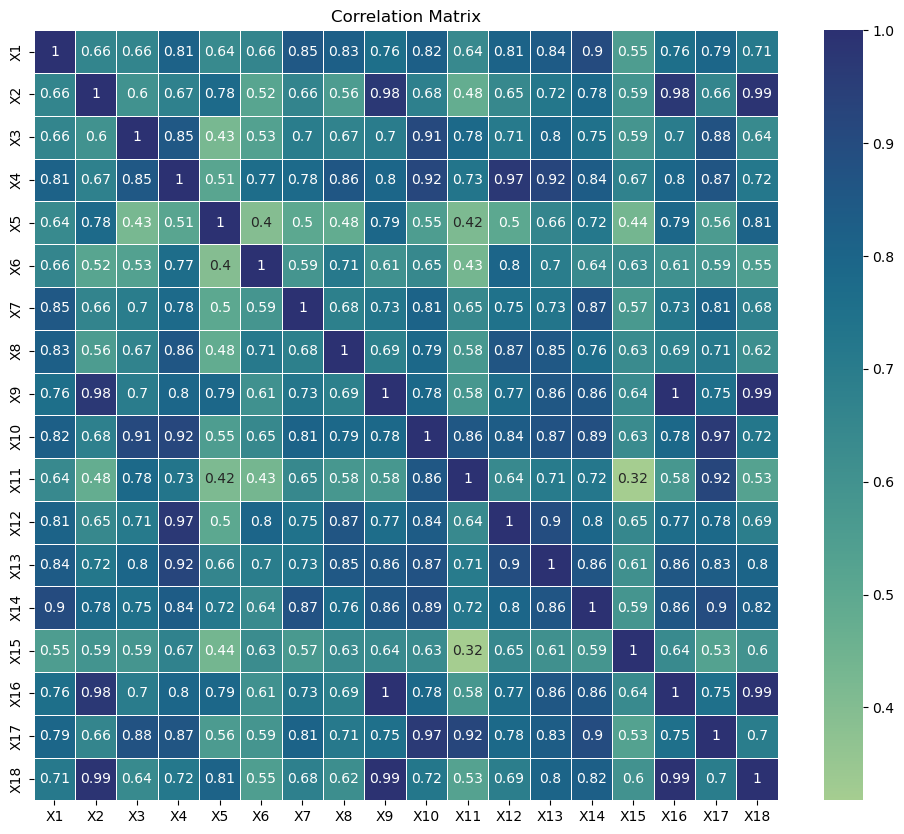

In [116]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap="crest")
plt.title('Correlation Matrix')

In [117]:
path = 'C://Users//Vanyusha//Desktop//datasets//american_bankruptcy.csv'
df = pd.read_csv(path)

df_clean = df.drop(columns=['company_name', 'status_label', 'year', 'status_label'], axis=1)

target = df_clean['X8']
features = df_clean.drop(columns=['X8', 'X9', 'X12', 'X13'], axis=1)

train_features, val_features, train_target, val_target = train_test_split(features, target, test_size=0.1, random_state=42)

Text(0.5, 1.0, 'Correlation Matrix')

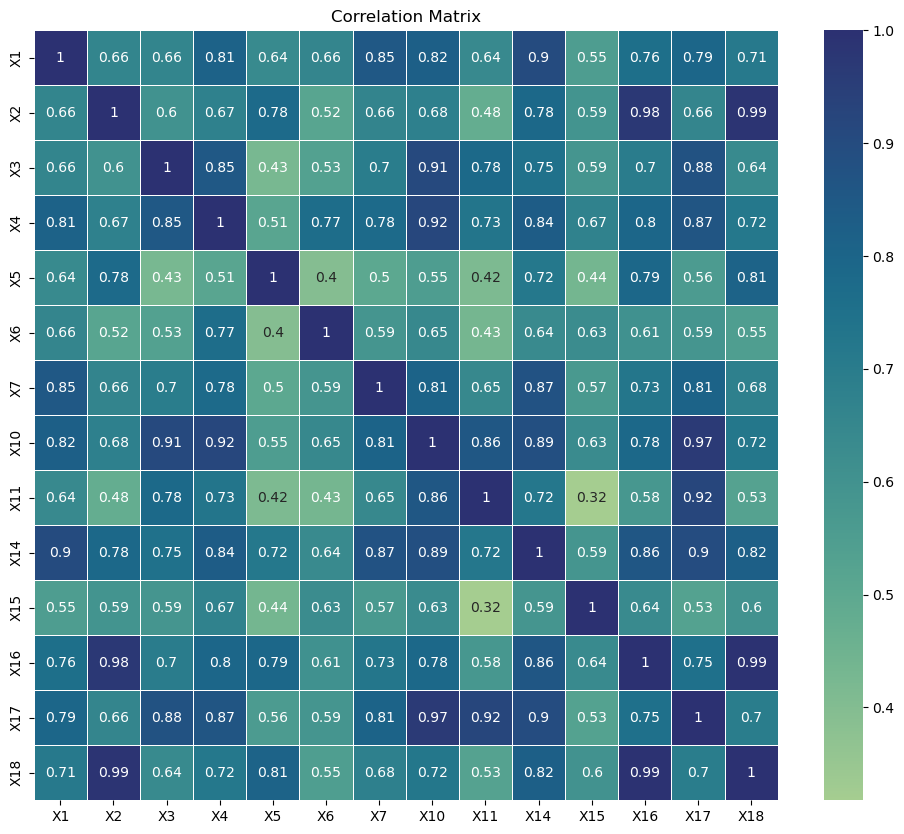

In [124]:
correlation_matrix = features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap="crest")
plt.title('Correlation Matrix')

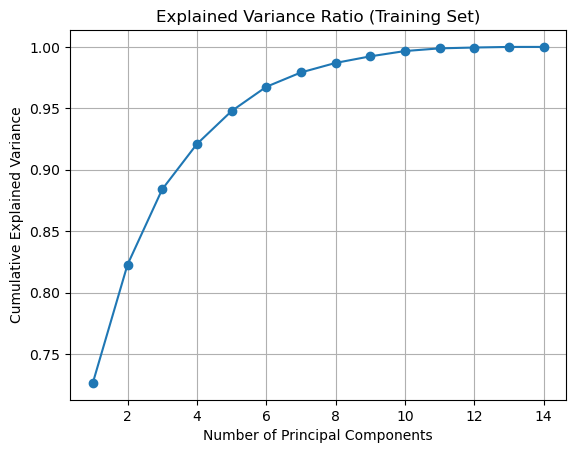

Explained Variance Ratio (Training Set):
[7.26470981e-01 9.62486774e-02 6.13496409e-02 3.68571543e-02
 2.68556957e-02 1.97330911e-02 1.16947062e-02 7.76418090e-03
 5.35821795e-03 4.31336044e-03 2.17984179e-03 6.88603479e-04
 4.85849198e-04 5.79863877e-13]

Cumulative Explained Variance (Training Set):
[0.72647098 0.82271966 0.8840693  0.92092645 0.94778215 0.96751524
 0.97920995 0.98697413 0.99233235 0.99664571 0.99882555 0.99951415
 1.         1.        ]


In [125]:
# Scale and PCA X
scaler_train = StandardScaler()
scaled_train_features = scaler_train.fit_transform(train_features)

pca_train = PCA()
train_principal_components = pca_train.fit_transform(scaled_train_features)

scaled_val_features = scaler_train.transform(val_features)
val_principal_components = pca_train.transform(scaled_val_features)

train_pc_df = pd.DataFrame(data=train_principal_components, columns=[f'PC{i}' for i in range(1, len(features.columns) + 1)])
val_pc_df = pd.DataFrame(data=val_principal_components, columns=[f'PC{i}' for i in range(1, len(features.columns) + 1)])

train_target_reset = train_target.reset_index(drop=True)
val_target_reset = val_target.reset_index(drop=True)

train_result_df = pd.concat([pd.Series(train_target_reset, name='X8').reset_index(drop=True), train_pc_df], axis=1)
val_result_df = pd.concat([pd.Series(val_target_reset, name='X8').reset_index(drop=True), val_pc_df], axis=1)

explained_var_ratio_train = pca_train.explained_variance_ratio_
cumulative_var_ratio_train = explained_var_ratio_train.cumsum()

plt.plot(range(1, len(explained_var_ratio_train) + 1), cumulative_var_ratio_train, marker='o')
plt.title('Explained Variance Ratio (Training Set)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print("Explained Variance Ratio (Training Set):")
print(explained_var_ratio_train)

print("\nCumulative Explained Variance (Training Set):")
print(cumulative_var_ratio_train)

In [132]:
X_train = train_result_df.drop(columns = ['X8', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'], axis=1)
y_train = train_result_df['X8']

X_val = val_result_df.drop(columns = ['X8', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'], axis=1)
y_val = val_result_df['X8']

In [133]:
# Scale y
scaler_target = StandardScaler()
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_target.transform(y_val.values.reshape(-1, 1))

# HistGradientBoostingRegressor

In [138]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_iter': [2000, 5000],
    'min_samples_leaf': [1, 20],
    'l2_regularization': [0, 0.01, 0.1]
}

hgb_regressor = HistGradientBoostingRegressor()
grid_search = GridSearchCV(hgb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
test_score = mean_squared_error(y_val, y_pred)

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)
print("Test Score:", test_score)

Best Parameters: {'l2_regularization': 0, 'learning_rate': 0.1, 'max_iter': 2000, 'min_samples_leaf': 1}
Best CV Score: -62894911.62664273
Test Score: 33489804.881265905


Mean Squared Error: 33489804.881265905
Mean Absolute Error: 1240.3010033240498
R-squared: 0.8459492930871562


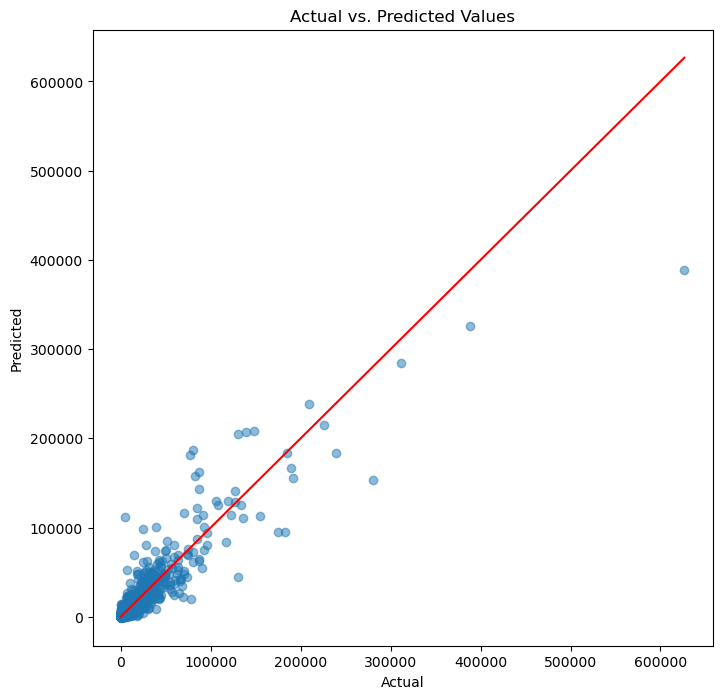

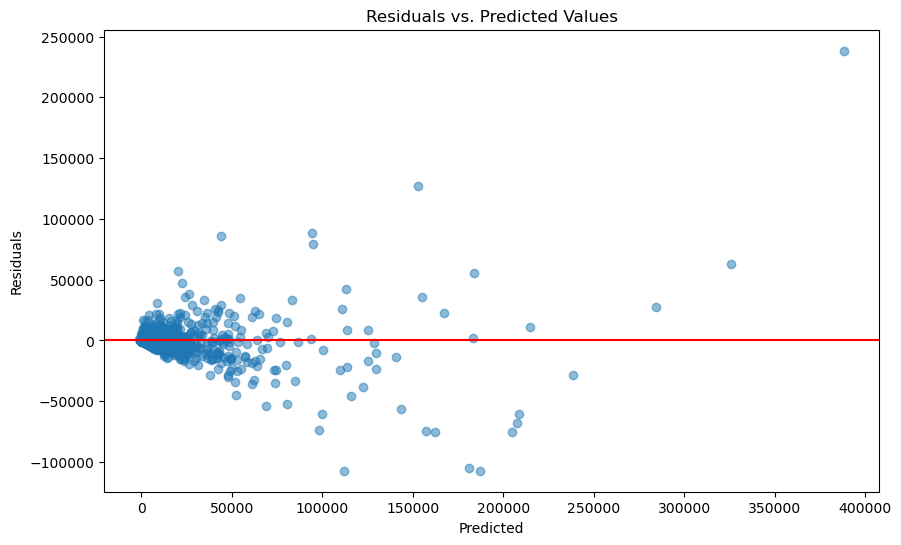

In [140]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


plt.figure(figsize=(8,8))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs. Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
plt.show()

residuals = y_val - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# ElasticNet

In [165]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8, 1]
}

elastic_net = ElasticNet()
grid_search_EN = GridSearchCV(elastic_net, param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search_EN.fit(X_train, y_train)

best_params_EN = grid_search_EN.best_params_
best_score_EN = grid_search_EN.best_score_

best_model_EN = grid_search_EN.best_estimator_
y_pred_EN = best_model_EN.predict(X_val)
test_score_EN = mean_squared_error(y_val, y_pred_EN)

print("Best Parameters:", best_params_EN)
print("Best CV Score:", -best_score_EN)
print("Test Score:", test_score_EN)

Best Parameters: {'alpha': 0.001, 'l1_ratio': 1}
Best CV Score: 62879016.90922252
Test Score: 35930165.74366747


In [166]:
mse_EN = mean_squared_error(y_val, y_pred_EN)
mae_EN = mean_absolute_error(y_val, y_pred_EN)
r2_EN = r2_score(y_val, y_pred_EN)

print(f"Mean Squared Error: {mse_EN}")
print(f"Mean Absolute Error: {mae_EN}")
print(f"R-squared: {r2_EN}")

Mean Squared Error: 35930165.74366747
Mean Absolute Error: 1424.4010080757243
R-squared: 0.8347238076802317


# Neural Network

In [100]:
X_train_nn = X_train.to_numpy()
y_train_nn = y_train_scaled
X_val_nn = X_val.to_numpy()
y_val_nn = y_val_scaled

X_train_tensor = torch.Tensor(X_train_nn)
Y_train_tensor = torch.Tensor(y_train_nn)
X_val_tensor = torch.Tensor(X_val_nn)
Y_val_tensor = torch.Tensor(y_val_nn)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [101]:
input_dim = X_train_nn.shape[1]
target_size = 1
epochs = 50
learning_rate = 0.001
dropout_rate = 0.4

In [102]:
input_dim

9

In [103]:
# Model
class RegLinNN(nn.Module):
    def __init__(self, input_dim, target_size, dropout_rate):
        super(RegLinNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 16)
        self.fc8 = nn.Linear(16, target_size)

        
    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.dropout(self.relu(self.fc5(x)))
        x = self.dropout(self.relu(self.fc6(x)))
        x = self.dropout(self.relu(self.fc7(x)))
        x = self.fc8(x)
        return x
model = RegLinNN(input_dim, target_size, dropout_rate).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=5, verbose=True)
patience = 5
min_delta = 0.001

In [104]:
train_loss_history = []
val_loss_history = []

best_val_loss = float('inf')
best_epoch = -1
best_predictions = None

best_train_loss = float('inf')
best_train_epoch = -1
best_train_predictions = None

best_val_loss_es = float("inf")
epochs_no_improve = 0
early_stop = False



for epoch in range(epochs):
    total_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / (batch_idx + 1)

    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for batch_idx, (val_inputs, val_targets) in enumerate(val_loader):
            val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets).item()

    average_val_loss = val_loss / (batch_idx + 1)
    print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {average_loss:.4f}, Validation Loss: {average_val_loss:.4f}")
    train_loss_history.append(average_loss)
    val_loss_history.append(average_val_loss)
              
    scheduler.step(average_val_loss)
     
    # Early stopping
    if epoch>=10:
        if average_val_loss < best_val_loss_es - min_delta:
            best_val_loss_es = average_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            early_stop = True
            break
    
    
if not early_stop:
    print("Training completed without early stopping.")
                
torch.save(model.state_dict(), 'RegLinNN_AFED.pth')

Epoch [1/50] - Loss: 0.5190, Validation Loss: 0.0769
Epoch [2/50] - Loss: 0.1663, Validation Loss: 0.6986
Epoch [3/50] - Loss: 0.1572, Validation Loss: 0.7863
Epoch [4/50] - Loss: 0.1544, Validation Loss: 0.8892
Epoch [5/50] - Loss: 0.1493, Validation Loss: 0.8482
Epoch [6/50] - Loss: 0.1439, Validation Loss: 0.8834
Epoch [7/50] - Loss: 0.1362, Validation Loss: 0.6380
Epoch 00007: reducing learning rate of group 0 to 5.0000e-04.
Epoch [8/50] - Loss: 0.1180, Validation Loss: 0.2666
Epoch [9/50] - Loss: 0.1138, Validation Loss: 0.2389
Epoch [10/50] - Loss: 0.1081, Validation Loss: 0.2351
Epoch [11/50] - Loss: 0.1042, Validation Loss: 0.2122
Epoch [12/50] - Loss: 0.1000, Validation Loss: 0.2094
Epoch [13/50] - Loss: 0.0970, Validation Loss: 0.1779
Epoch 00013: reducing learning rate of group 0 to 2.5000e-04.
Epoch [14/50] - Loss: 0.0901, Validation Loss: 0.0877
Epoch [15/50] - Loss: 0.0853, Validation Loss: 0.0888
Epoch [16/50] - Loss: 0.0827, Validation Loss: 0.0889
Epoch [17/50] - Loss:

In [111]:
# Evaluation
model.eval()

all_predictions = []
all_actuals = []

with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)

        all_predictions.extend(outputs.cpu().numpy())
        all_actuals.extend(targets.cpu().numpy())

all_predictions = np.array(all_predictions)
all_actuals = np.array(all_actuals)

all_predictions_unscaled = scaler_target.inverse_transform(all_predictions)
all_actuals_unscaled = scaler_target.inverse_transform(all_actuals)

mse = mean_squared_error(all_actuals_unscaled, all_predictions_unscaled)
mae = mean_absolute_error(all_actuals_unscaled, all_predictions_unscaled)
r2 = r2_score(all_actuals_unscaled, all_predictions_unscaled)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 23211454.0
Mean Absolute Error: 1080.7359619140625
R2 Score: 0.8932289783557029


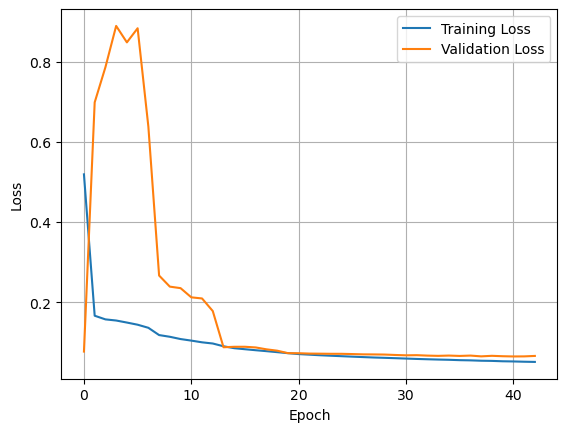

In [167]:
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()